# Univariate Linear Regression using Numpy

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

## Load the dataset

In [2]:
dataset = load_boston()
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
features = dataset.data
y = dataset.target[:,np.newaxis] 

# np.newaxis increases the dimension of the existing array which in this
# context transforms `y` from a 1-dimensional array to 2-dimensional array

## Visualizing the Dataset

### CRIM - per capita crime rate by town

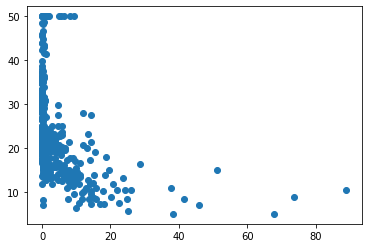

In [4]:
CRIM = features[:,0]
plt.scatter(CRIM,y)

### ZN - proportion of residential land zoned for lots over 25,000 sq.ft

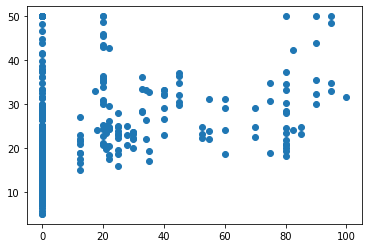

In [5]:
ZN = features[:,1] 
plt.scatter(ZN,y)

### INDUS - proportion of non-retail business acres per town

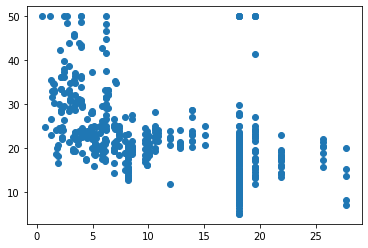

In [6]:
INDUS = features[:,2] 
plt.scatter(INDUS,y)

### CHAS - Charles River dummy variable

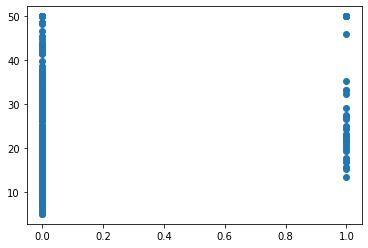

In [7]:
CHAS = features[:,3] 
plt.scatter(CHAS,y)

### NOX - nitric oxides concentration (parts per 10 million)

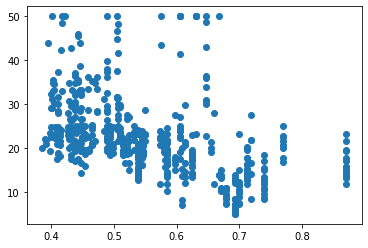

In [8]:
NOX = features[:,4] 
plt.scatter(NOX,y)

### RM - average number of rooms per dwelling

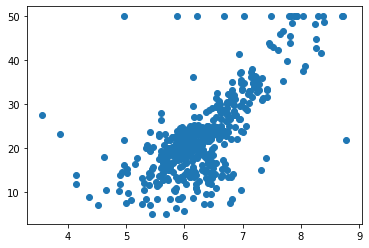

In [9]:
RM = features[:,5] 
plt.scatter(RM,y)

### AGE - proportion of owner-occupied units built prior to 1940

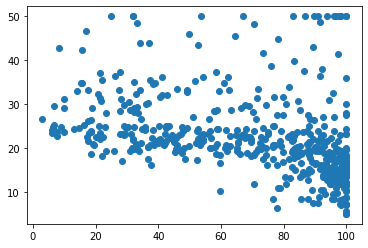

In [10]:
AGE = features[:,6] 
plt.scatter(AGE,y)

### DIS - weighted distances to five Boston employment centres

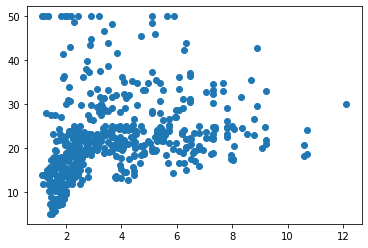

In [11]:
DIS = features[:,7] 
plt.scatter(DIS,y)

### RAD - index of accessibility to radial highways

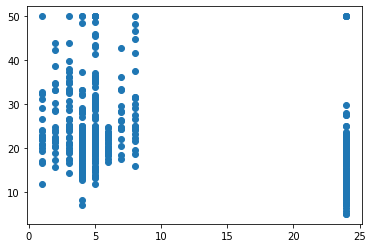

In [12]:
RAD = features[:,8] 
plt.scatter(RAD,y)

### TAX - full-value property-tax rate per $10,000

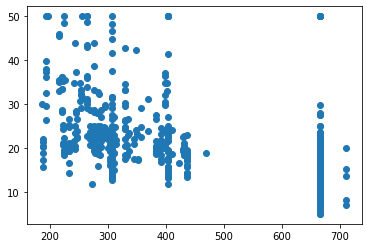

In [13]:
TAX = features[:,9] 
plt.scatter(TAX,y)

### PTRATIO - pupil-teacher ratio by town

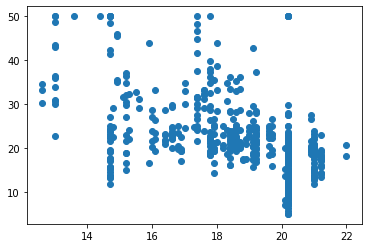

In [14]:
PTRATIO = features[:,10] 
plt.scatter(PTRATIO,y)

### B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

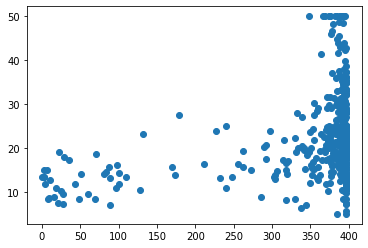

In [15]:
B = features[:,11] 
plt.scatter(B,y)

### LSTAT - % lower status of the population

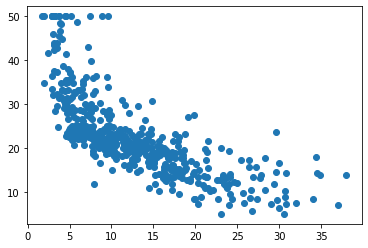

In [16]:
LSTAT = features[:,12] 
plt.scatter(LSTAT,y)

## Modelling


### Hypothesis



**Hypothesis** is a function that takes the input features $X$ and outputs a prediction or an estimated value of $y.$ We used a linear function expressed as 

$h(x) = \theta_0 + \theta_1x$ 

because we only have one feature to fit a function where $\theta_0$ is the bias, $\theta_1$ is the weights, and $x$ is the input features.

With knowledge of linear algebra, we can simplify the expression above as 

$h = X\cdot\theta$

to use matrix operations.

To do so we must create a matrix $X$ where in the first column consists of `np.ones` and the second column consists of the features RM or the average number of rooms per dwelling.

In [17]:
X = np.ones((RM.shape[0],2))
X[:,1:] = RM[:,np.newaxis]
X

array([[1.   , 6.575],
       [1.   , 6.421],
       [1.   , 7.185],
       ...,
       [1.   , 6.976],
       [1.   , 6.794],
       [1.   , 6.03 ]])

In [18]:
# Creates an array with two columns, replace the 2nd column with the features
%timeit X = np.ones((RM.shape[0],2)) ; X[:,1:] = RM[:,np.newaxis] 

The slowest run took 107.29 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.65 µs per loop


In [19]:
# Append two arrays column wise
%timeit X = np.hstack((np.ones((RM.shape[0],1)), RM[:,np.newaxis]))

The slowest run took 14.52 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 9.22 µs per loop


In [20]:
# Append two arrays row wise
%timeit X = np.c_[np.ones((RM.shape[0])), RM]

The slowest run took 8.90 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 25.6 µs per loop


Now we need to set random values for $\theta$.

In [0]:
theta = np.random.randn(2)
theta = theta[:,np.newaxis]

In [22]:
print(X.shape, theta.shape)

(506, 2) (2, 1)


Create the hypothesis function as a method

In [0]:
def hypothesis(X,theta):
  return X @ theta

In [27]:
%timeit X @ theta

The slowest run took 306.10 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 1.99 µs per loop


In [28]:
%timeit np.matmul(X,theta)

The slowest run took 108.57 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.11 µs per loop


In [29]:
%timeit np.dot(X,theta)

The slowest run took 27.14 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.93 µs per loop


![alt text](https://i.stack.imgur.com/UvIqj.png)

### Cost Function

This function measures the performance of the model. In univariate linear regression, the function is expressed as

$ J(\theta_0,\theta_1) = \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(y_i-\hat{y_i})^2 $

or also known as the Mean Squared Error (MSE).

Breaking down the equation:  

1.   $\hat{y} \longrightarrow$ output of the hypothesis $h(x)$ (purple dots)
2.   $y \longrightarrow$ the labels (point that sits on the line)
3.   $(y_i-\hat{y_i})^2 \longrightarrow$ For each point, subtract the hypothesis from the labels and square its result. 
4.   $\frac{1}{m}\displaystyle\sum_{i = 1}^{m}(y_i-\hat{y_i})^2 \longrightarrow$ Find the sum for each squared difference and divide it by the total number of examples.







![alt text](https://cdn-media-1.freecodecamp.org/images/MNskFmGPKuQfMLdmpkT-X7-8w2cJXulP3683)

In [0]:
def cost_function(X,y,theta):
  return sum(np.square((y - hypothesis(X,theta))))/len(X)

In [31]:
test = cost_function(X,y,theta)
print(test)

[496.36707849]


Compare different versions of the squared difference. The difference in efficiency is minimal as shown below. However, in this case we use `np.square()` for slightly better performance and for using only a power raised to 2.

In [32]:
# Use double asterisk (**) for squaring 
def cost_function(X,y,theta):
  return sum((y - hypothesis(X,theta))**2)/len(X)

%timeit test = cost_function(X,y,theta)
test

1000 loops, best of 3: 347 µs per loop


array([496.36707849])

In [33]:
# Use np.power()
def cost_function(X,y,theta):
  return sum(np.power((y - hypothesis(X,theta)),2))/len(X)

%timeit test = cost_function(X,y,theta)
test

1000 loops, best of 3: 349 µs per loop


array([496.36707849])

In [34]:
# Use np.square()
def cost_function(X,y,theta):
  return sum(np.square((y - hypothesis(X,theta))))/len(X)

%timeit test = cost_function(X,y,theta)
test

1000 loops, best of 3: 352 µs per loop


array([496.36707849])

### Gradient Descent

Recall the cost function

 $ J(\theta_0,\theta_1) = \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(y_i-\hat{y_i})^2 $

 we need to expand it in order to see what steps must be followed in order to conduct the gradient descent.

 $ J(\theta_0,\theta_1) = \frac{1}{m}\displaystyle\sum_{i = 1}^{m}(y_i-(\theta_0 + \theta_1x_i))^2 $

 To get the partial derivative of both $\theta_0$ and $\theta_1$, we use the chain rule.

 $\frac{\partial J}{\partial \theta_0} = \frac{2}{m}\displaystyle\sum_{i = 1}^{m}-(y_i-(\theta_0 + \theta_1x_i))$

  $\frac{\partial J}{\partial \theta_1} = \frac{2}{m}\displaystyle\sum_{i = 1}^{m}-x\cdot(y_i-(\theta_0 + \theta_1x_i))$

In [0]:
def gradient_descent(X,y,theta,alpha,iterations):
  for i in range(iterations):
    predictions = hypothesis(X,theta)
    theta = theta - (alpha/len(X))*(-X.T.dot(y-predictions))

    if i % 50 == 0:
      print(f'Error in {i}th iteration: {cost_function(X,y,theta)}')

In [41]:
iterations = 100000
alpha = 0.03
gradient_descent(X,y,theta,alpha,iterations)

Error in 0th iteration: [80.60481319]
Error in 50th iteration: [57.03450655]
Error in 100th iteration: [56.55848356]
Error in 150th iteration: [56.09932812]
Error in 200th iteration: [55.65644254]
Error in 250th iteration: [55.2292503]
Error in 300th iteration: [54.81719533]
Error in 350th iteration: [54.41974125]
Error in 400th iteration: [54.03637068]
Error in 450th iteration: [53.66658458]
Error in 500th iteration: [53.3099016]
Error in 550th iteration: [52.96585743]
Error in 600th iteration: [52.63400424]
Error in 650th iteration: [52.31391004]
Error in 700th iteration: [52.00515815]
Error in 750th iteration: [51.70734668]
Error in 800th iteration: [51.42008795]
Error in 850th iteration: [51.14300804]
Error in 900th iteration: [50.87574627]
Error in 950th iteration: [50.61795473]
Error in 1000th iteration: [50.36929786]
Error in 1050th iteration: [50.12945198]
Error in 1100th iteration: [49.89810487]
Error in 1150th iteration: [49.67495539]
Error in 1200th iteration: [49.45971306]
